In [9]:
import pandas as pd
import numpy as np
from datetime import datetime, timedelta

# Generate syntheic data
np.random.seed(42)
data = {
    "order_id": range(1001, 1101),
    "customer_id": np.random.choice(["C100", "C101", "C102", "C103", "C104"], 100),
    "product": np.random.choice(["Laptop", "Phone", "Tablet", "Headphones", "Monitor"], 100),
    "category": np.random.choice(["Electronics", "Accessories"], 100),
    "price": np.round(np.random.uniform(50, 1500, 100), 2),
    "quantity": np.random.randint(1, 5, 100),
    "order_date": [datetime(2023, 1, 1) + timedelta(days=np.random.randint(0, 90)) for _ in range(100)],
    "region": np.random.choice(["North", "South", "East", "West"], 100),
    "delivery_status": np.random.choice(["Delivered", "Shipped", "Processing", "Cancelled"], 100, p=[0.6, 0.2, 0.15, 0.05])
}

# Introduce missing values (for practice)
data["price"][[5, 10, 15]] = np.nan
data["region"][[20, 25]] = None

# Create DataFrame
df = pd.DataFrame(data)
df.head()

,order_id,customer_id,product,category,price,quantity,order_date,region,delivery_status
0,1001,C103,Headphones,Accessories,700.22,2,2023-02-02,North,Processing
1,1002,C104,Laptop,Accessories,1491.96,1,2023-02-02,West,Delivered
2,1003,C102,Headphones,Accessories,305.09,2,2023-03-02,South,Delivered
3,1004,C104,Phone,Electronics,76.21,1,2023-02-20,North,Cancelled
4,1005,C104,Laptop,Electronics,766.15,2,2023-02-12,South,Processing


In [12]:
# STEP-BY-STEP DATA ANALYST WORKFLOW

In [ ]:
# Step 1: Initial Data Inspection
"""
Key Actions:
- Identify missing values ("price", "region").
- Check data distributions ("quantity" ranges from 1-4)
"""
# Basic info
print(df.info()) # Check data types and missing values

# Summary statistics
print(df.describe()) # For numerical columns

# Unique values in categorical colums
print(df["delivery_status"].value_counts())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100 entries, 0 to 99
Data columns (total 9 columns):
 #   Column           Non-Null Count  Dtype         
---  ------           --------------  -----         
 0   order_id         100 non-null    int64         
 1   customer_id      100 non-null    object        
 2   product          100 non-null    object        
 3   category         100 non-null    object        
 4   price            97 non-null     float64       
 5   quantity         100 non-null    int64         
 6   order_date       100 non-null    datetime64[ns]
 7   region           100 non-null    object        
 8   delivery_status  100 non-null    object        
dtypes: datetime64[ns](1), float64(1), int64(2), object(5)
memory usage: 7.2+ KB
None
          order_id        price   quantity           order_date
count   100.000000    97.000000  100.00000                  100
mean   1050.500000   741.549175    2.47000  2023-02-13 18:43:12
min    1001.000000    57.520000    1

In [ ]:
# Step 2: Data Cleaning

# Handle missing values
df["price"].fillna(df["price"].median(), inplace=True) # Fill NaN with median price
df["region"].fillna("Unknown",inplace=True) # Fill missing regions

# Convert date to datetime (if not already)
df["order_date"] = pd.to_datetime(df["order_date"])

# Remove test orders (example)
df = df[df["price"] > 0] # Filter out free/negative prices

In [ ]:
# Step 3: Feature Engineering

# Add new columns
df["total_sales"] = df["price"] * df["quantity"]
df["month"] = df["order_date"].dt.month_name()

# Categorize prodcuts by price tier
df["price_tier"] = pd.cut(
    df["price"],
    bins=[0, 200, 500, 1500],
    labels=["Budget", "Mid-Range", "Premium"]
)

# Missing Data Check
print(df.isnull().sum())

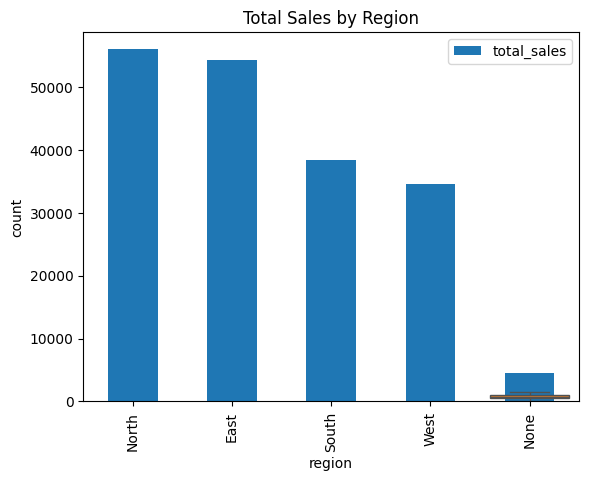

month,February,January,March
region,,,
East,16417.15,14678.87,23127.73
None,NaN,NaN,4503.04
North,17481.21,8616.85,29803.85
South,18198.41,13537.71,6586.33
West,13237.18,14522.16,6713.09


In [36]:
# Step 4: Exploratory Data Analysis (EDA)
import matplotlib.pyplot as plt
import seaborn as sns

"""
Key Questions to Answer:
- Which region has the highest sales?
- What's the average price of Electronics vs Accessories?
- How many orders were cancelled?
"""

# Sales by region
region_sales = df.groupby("region")["total_sales"].sum().sort_values(ascending=False)
region_sales.plot(kind="bar", title="Total Sales by Region")

# Delivery status distribution
sns.countplot(data=df, x="delivery_status")

# Price distribution by category
sns.boxplot(data=df, x="category", y="price")
plt.show()

# Pivot Table of "total_sales" by "region" and "month"
pd.pivot_table(df, values="total_sales", index="region", columns="month", aggfunc="sum")

In [ ]:
# Step 5: Advanced Analysis

# Top Customers
top_customers = df.groupby("customer_id")["total_sales"].sum().nlargest(3)
print(f"Top 3 Customers:\n{top_customers}")

# Monthly Sales Trend
monthly_sales = df.groupby("month")["total_sales"].sum()
monthly_sales.plot(kind="line", marker="o", title="Monthly Sales Trend")

# Find all "Delivered" orders with "total_sales" > $1000
delivered_high_value = df[(df["delivery_status"] == "Delivered") & (df["total_sales"] > 1000)]
print(f"High Value Orders:\n{delivered_high_value}")

# Product Performance
product_performance = df.groupby("product").agg(
    total_units=("quantity", "sum"),
    total_revenue=("total_sales", "sum")
).sort_values("total_revenue", ascending=False)
print(f"Product Performance:\n{product_performance}")

In [29]:
# Step 6: Exporting Results

# Save cleaned data
df.to_csv("cleaned_sales_data.csv", index=False)

# Export summary stats
product_performance.to_excel("product_performance.xlsx")